___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# google drive'ı colab'e bağlamak için bunu çalıştırıp izin vermemiz gerekiyor.

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analiz/NLP/Womens Clothing E-Commerce Reviews.csv")

In [ ]:
df.head(5)

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.duplicated().sum()

0

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df["Recommended IND"].value_counts(dropna = False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

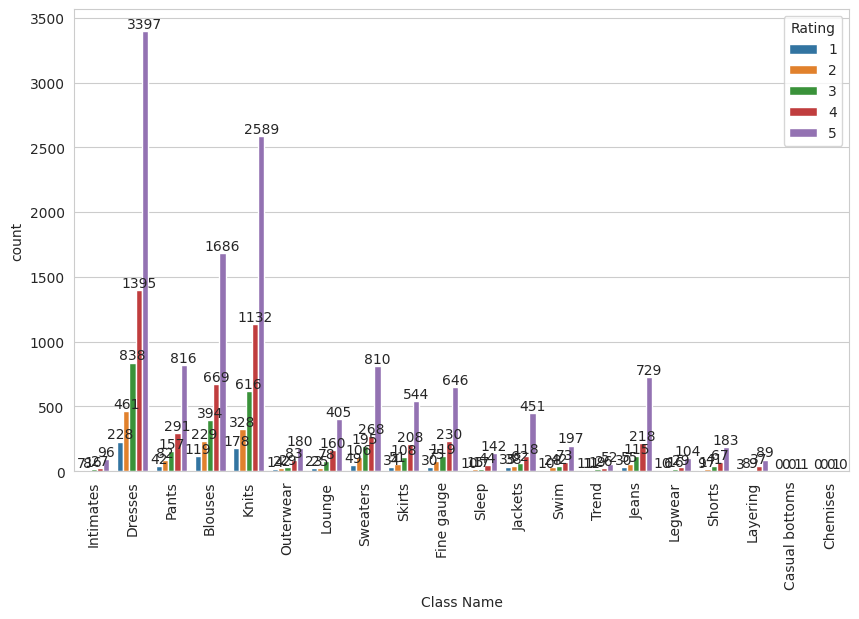

In [ ]:
ax = sns.countplot(data = df, x ="Class Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

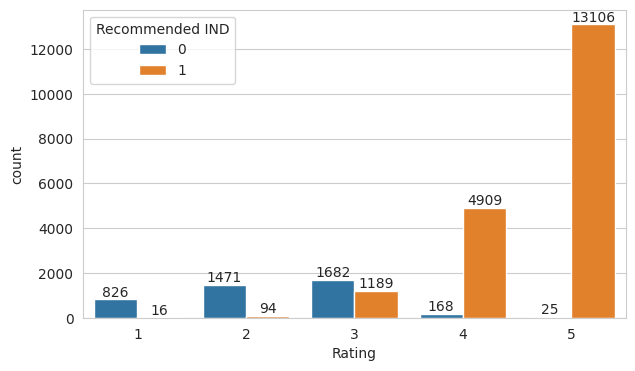

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", 
                   data=df, 
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df["Recommended IND"].value_counts(normalize=True)

1   0.822
0   0.178
Name: Recommended IND, dtype: float64

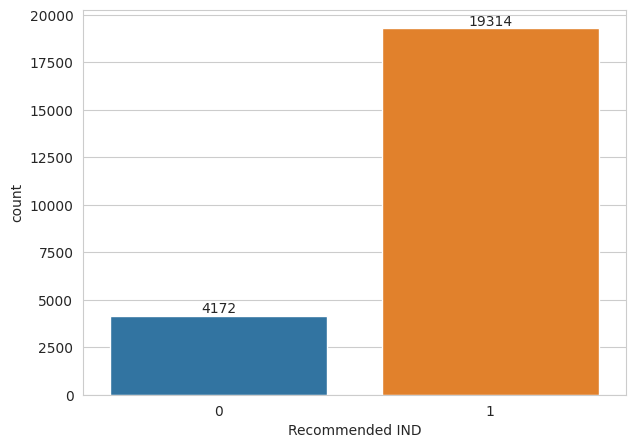

In [ ]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND", 
                   data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df1 =df[["Review Text", "Recommended IND"]]
df1.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [ ]:
df1.rename(columns={"Review Text":"text", "Recommended IND":"label"}, 
          inplace=True)

<ipython-input-20-502e8d7cf017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={"Review Text":"text", "Recommended IND":"label"},


In [ ]:
df1.head()

text  label
0  Absolutely wonderful - silky and sexy and comf...      1
1  Love this dress!  it's sooo pretty.  i happene...      1
2  I had such high hopes for this dress and reall...      0
3  I love, love, love this jumpsuit. it's fun, fl...      1
4  This shirt is very flattering to all due to th...      1

---
---


### Missing Value Detection

In [ ]:
df1.isnull().sum()

text     845
label      0
dtype: int64

In [ ]:
df1.dropna(inplace = True)
df1.reset_index(drop=True, 
               inplace=True)
df1

<ipython-input-23-b38bfe3c1592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


text  label
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
22636  I was very happy to snag this dress at such a ...      1
22637  It reminds me of maternity clothes. soft, stre...      1
22638  This fit well, but the top was very see throug...      0
22639  I bought this dress for a wedding i have this ...      1
22640  This dress in a lovely platinum is feminine an...      1

[22641 rows x 2 columns]

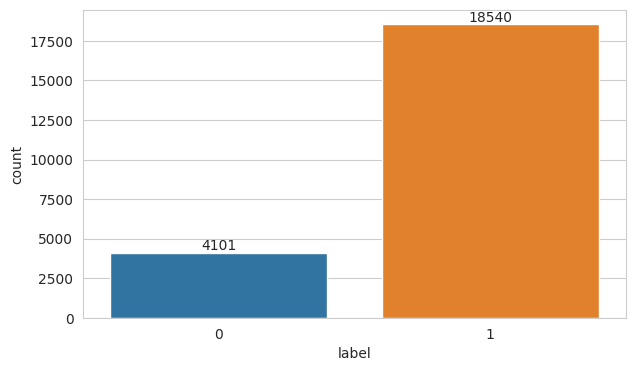

In [ ]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="label", 
                   data=df1)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import tensorflow as tf
import os



In [ ]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [ ]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #9. joining
    return " ".join( text_cleaned)

In [ ]:
cleaning_text = df1["text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
positive_sentences = df1[df1["label"] == 1]["text"] 

positive_sentences

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
22635    So i wasn't sure about ordering this skirt bec...
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 18540, dtype: object

In [ ]:
negative_sentences = df1[df1["label"] == 0]["text"] 

negative_sentences

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet 

In [ ]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
worldcloud = WordCloud(background_color="pink", max_words =250)

In [ ]:
positive = worldcloud.generate(positive_words)

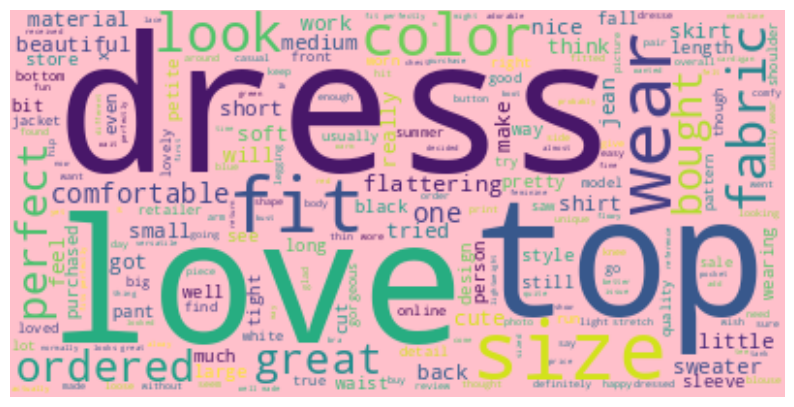

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(positive, interpolation="bilinear")
plt.axis("off")
plt.show()

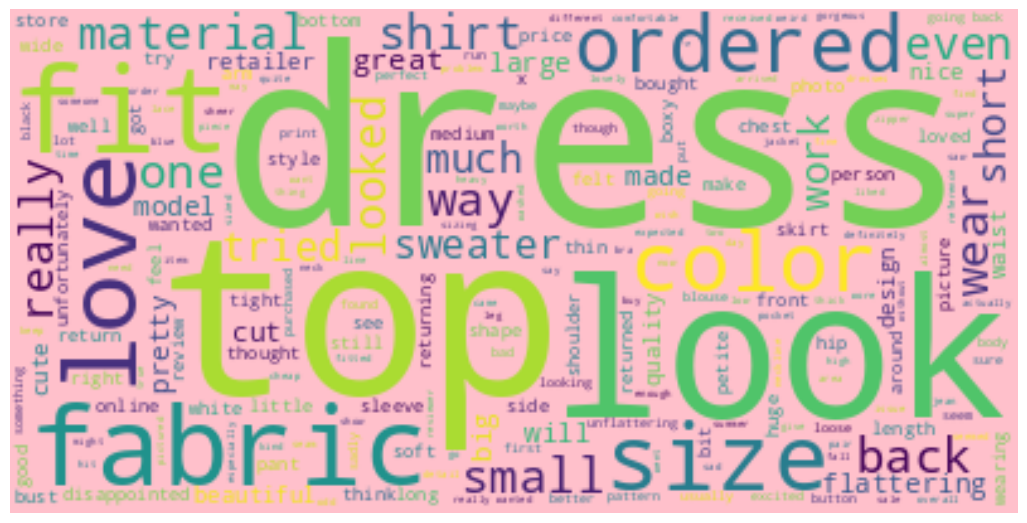

In [ ]:
wordcloud_negative = WordCloud(background_color="pink", 
                               max_words=250, 
                               )

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, 
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1["text"].values
y = df1["label"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    stratify=y, 
                                                    random_state=101)

In [ ]:
len(y)

22641

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0     0        0        0     0    0         0           0   
1       0     0        0        0     0    0         0           0   
2       0     0        0        0     0    0         0           0   
3       0     0        0        0     0    0         0           0   
4       0     0        0        0     0    0         0           0   
...    ..   ...      ...      ...   ...  ...       ...         ...   
20371   0     0        0        0     0    0         0           0   
20372   0     0        0        0     0    0         0           0   
20373   0     0        0        0     0    0         0           0   
20374   0     0        0        0     0    0         0           0   
20375   0     0        0        0     0    0         0           0   

       absolutley  abstract  abt  abundance  ac  accent  accented  accentuate  \
0               0         0    0          0   0       0         0           0   
1               0         0    0          0   0       0         0           0   
2               0         0    0          0   0       0         0           0   
3               0         0    0          0   0       0         0           0   
4               0         0    0          0   0       0         0           0   
...           ...       ...  ...        ...  ..     ...       ...         ...   
20371           0         0    0          0   0       0         0           0   
20372           0         0    0          0   0       0         0           0   
20373           0         0    0          0   0       0         0           0   
20374           0         0    0          0   0       0         0           0   
20375           0         0    0          0   0       0         0           0   

       accentuated  accentuates  accentuating  acceptable  access  \
0                0            0             0           0       0   
1                0            0             0           0       0   
2                0            0             0           0       0   
3                0            0             0           0       0   
4                0            0             0           0       0   
...            ...          ...           ...         ...     ...   
20371            0            0             0           0       0   
20372            0            0             0           0       0   
20373            0            0             0           0       0   
20374            0            0             0           0       0   
20375            0            0             0           0       0   

       accessorize  accessorized  accessory  accident  accidental  \
0                0             0          0         0           0   
1                0             0          0         0           0   
2                0             0          0         0           0   
3                0             0          0         0           0   
4                0             0          0         0           0   
...            ...           ...        ...       ...         ...   
20371            0             0          0         0           0   
20372            0             0          0         0           0   
20373            0             0          0         0           0   
20374            0             0          0         0           0   
20375            0             0          0         0           0   

       accidentally  accommodate  accommodates  accommodating  accomodate  \
0                 0            0             0              0           0   
1                 0            0             0              0           0   
2                 0            0             0              0           0   
3                 0            0             0              0           0   
4                 0            0             0              0           0   
...             ...          ...           ...            ...         ...

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, 
                                    min_df=3, 
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
4     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...      ...      ...   ...   ...       ...         ...   
20371 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
20372 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
20373 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
20374 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
20375 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract   abt  abundance    ac  accent  accented  \
0           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...   ...        ...   ...     ...       ...   
20371       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
20372       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
20373       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
20374       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
20375       0.000     0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  acceptable  access  \
0           0.000        0.000        0.000         0.000       0.000   0.000   
1           0.000        0.000        0.000         0.000       0.000   0.000   
2           0.000        0.000        0.000         0.000       0.000   0.000   
3           0.000        0.000        0.000         0.000       0.000   0.000   
4           0.000        0.000        0.000         0.000       0.000   0.000   
...           ...          ...          ...           ...         ...     ...   
20371       0.000        0.000        0.000         0.000       0.000   0.000   
20372       0.000        0.000        0.000         0.000       0.000   0.000   
20373       0.000        0.000        0.000         0.000       0.000   0.000   
20374       0.000        0.000        0.000         0.000       0.000   0.000   
20375       0.000        0.000        0.000         0.000       0.000   0.000   

       accessorize  accessorized  accessory  accident  accidental  \
0            0.000         0.000      0.000     0.000       0.000   
1            0.000         0.000      0.000     0.000       0.000   
2            0.000         0.000      0.000     0.000       0.000   
3            0.000         0.000      0.000     0.000       0.000   
4            0.000         0.000      0.000     0.000       0.000   
...            ...           ...        ...       ...         ...   
20371        0.000         0.000      0.000     0.000       0.000   
20372        0.000         0.000      0.000     0.000       0.000   
20373        0.000         0.000      0.000     0.000       0.000   
20374        0.000         0.000      0.000     0.000       0.000   
20375        0.000         0.000      0.000     0.000       0.000   

       accidentally  accommodate  accommodates  accommodating  accomodate  \
0             0.000        0.000         0.000          0.000       0.000   
1             0.000        0.000         0.000          0.000       0.000   
2             0.000        0.000         0.000          0.000       0.000   
3             0.000        0.000         0.000          0.000       0.000   
4             0.000        0.000         0.000          0.000       0.000   
...

### Eval Function

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, 
                         max_iter=1000, 
                         class_weight= "balanced", 
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 350   60]
 [ 263 1592]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       410
           1       0.96      0.86      0.91      1855

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.89      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.70      3691
           1       0.97      0.86      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, 
                           max_iter=1000, 
                           class_weight= "balanced", 
                           random_state=101)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.847
train_accuracy    0.860
test_f1           0.901
train_f1          0.909
test_recall       0.847
train_recall      0.854
test_precision    0.962
train_precision   0.971
dtype: float64

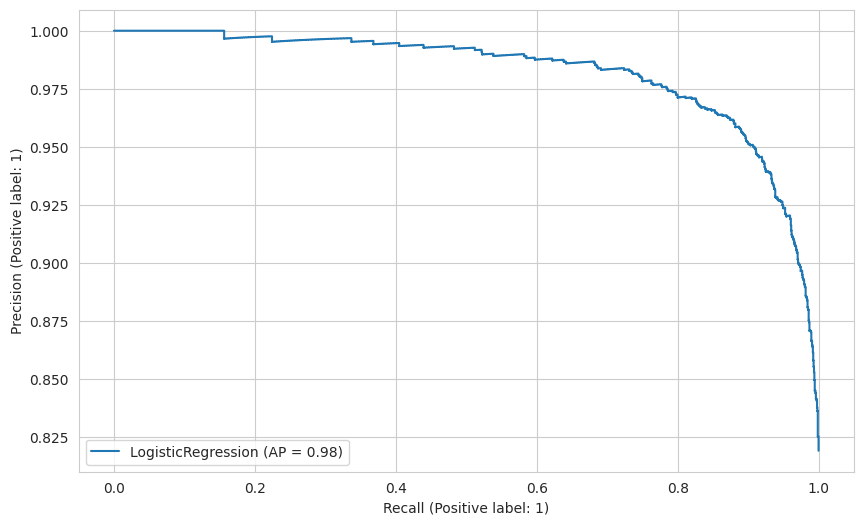

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log, 
                                      X_test_count, 
                                      y_test);




In [ ]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.05, 
                         max_iter=1000, 
                         random_state=101, 
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 355   55]
 [ 281 1574]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       410
           1       0.97      0.85      0.90      1855

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      3691
           1       0.97      0.84      0.90     16685

    accuracy                           0.85     20376
   macro avg       0.76      0.86      0.79     20376
weighted avg       0.89      0.85      0.86     20376



In [ ]:
model = LogisticRegression(C=0.05, 
                           max_iter=1000, 
                           random_state=101, 
                           class_weight="balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.839
train_accuracy    0.847
test_f1           0.894
train_f1          0.900
test_recall       0.834
train_recall      0.838
test_precision    0.964
train_precision   0.970
dtype: float64

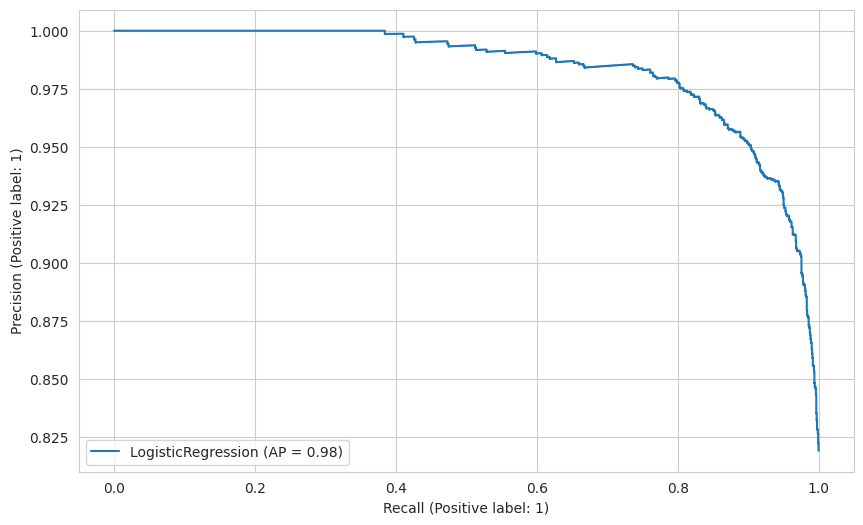

In [ ]:
PrecisionRecallDisplay.from_estimator(log, 
                                      X_test_tf_idf, 
                                      y_test);

In [ ]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 309  101]
 [ 139 1716]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       410
           1       0.94      0.93      0.93      1855

    accuracy                           0.89      2265
   macro avg       0.82      0.84      0.83      2265
weighted avg       0.90      0.89      0.90      2265

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      3691
           1       0.96      0.92      0.94     16685

    accuracy                           0.90     20376
   macro avg       0.82      0.86      0.84     20376
weighted avg       0.91      0.90      0.90     20376



In [ ]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.882
train_accuracy    0.902
test_f1           0.927
train_f1          0.939
test_recall       0.912
train_recall      0.924
test_precision    0.943
train_precision   0.955
dtype: float64

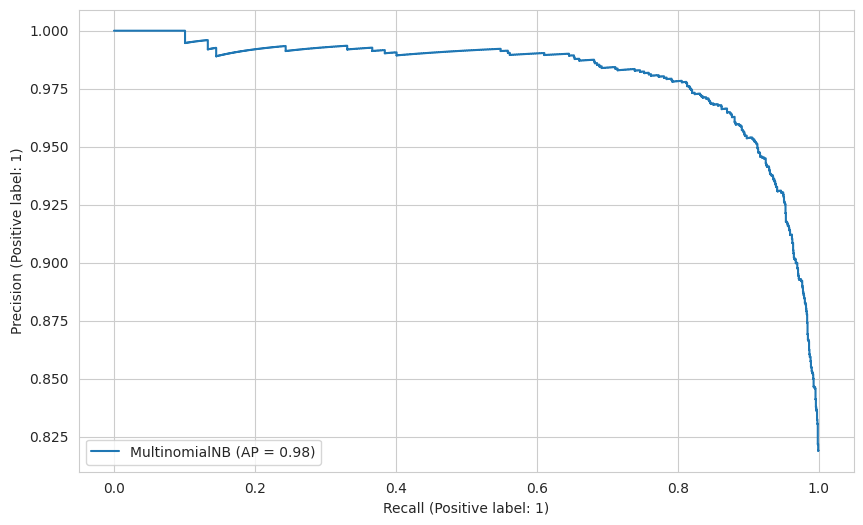

In [ ]:
PrecisionRecallDisplay.from_estimator(nb, 
                                      X_test_count, 
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb = BernoulliNB(alpha=0.8)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.8)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 299  111]
 [ 145 1710]]
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       410
           1       0.94      0.92      0.93      1855

    accuracy                           0.89      2265
   macro avg       0.81      0.83      0.82      2265
weighted avg       0.89      0.89      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      3691
           1       0.96      0.92      0.94     16685

    accuracy                           0.90     20376
   macro avg       0.82      0.86      0.84     20376
weighted avg       0.91      0.90      0.90     20376



In [ ]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.876
train_accuracy    0.898
test_f1           0.923
train_f1          0.937
test_recall       0.904
train_recall      0.918
test_precision    0.942
train_precision   0.956
dtype: float64

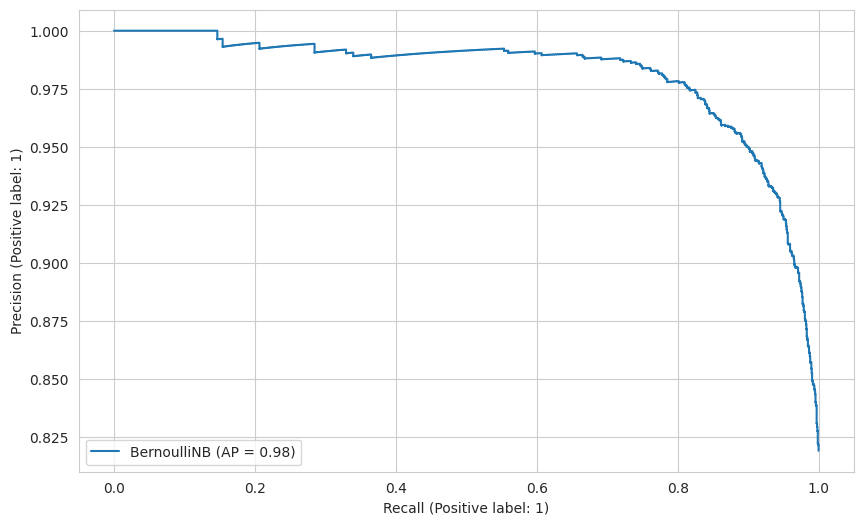

In [ ]:
PrecisionRecallDisplay.from_estimator(nb, 
                                      X_test_tf_idf, 
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, 
                class_weight="balanced", 
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 352   58]
 [ 260 1595]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       410
           1       0.96      0.86      0.91      1855

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.89      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      3691
           1       0.97      0.85      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [ ]:
model = LinearSVC(C=0.001, 
                  class_weight="balanced", 
                  random_state=101)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.847
train_accuracy    0.860
test_f1           0.901
train_f1          0.909
test_recall       0.847
train_recall      0.854
test_precision    0.962
train_precision   0.972
dtype: float64

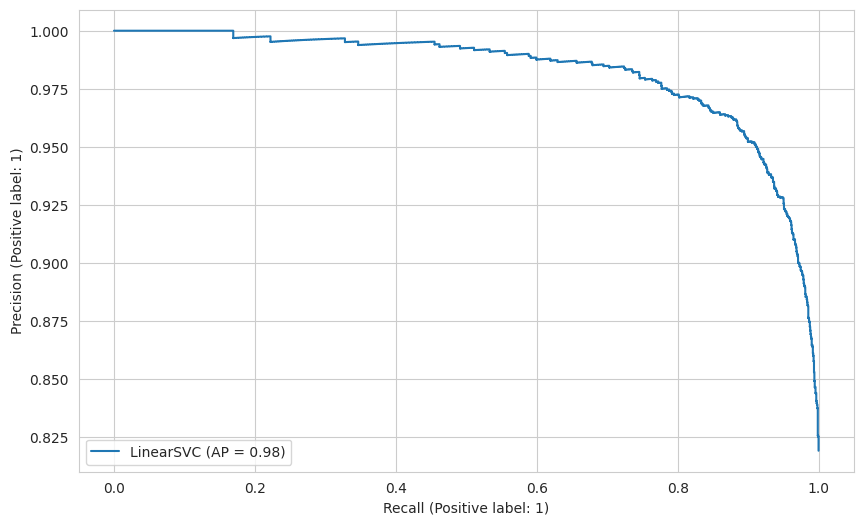

In [ ]:
PrecisionRecallDisplay.from_estimator(svc, 
                                      X_test_count, 
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.03, 
                class_weight="balanced", 
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 360   50]
 [ 257 1598]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.88      0.70       410
           1       0.97      0.86      0.91      1855

    accuracy                           0.86      2265
   macro avg       0.78      0.87      0.81      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.91      0.72      3691
           1       0.98      0.86      0.92     16685

    accuracy                           0.87     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [ ]:
model = LinearSVC(C=0.03, 
                  class_weight="balanced", 
                  random_state=101)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.858
train_accuracy    0.873
test_f1           0.908
train_f1          0.918
test_recall       0.856
train_recall      0.864
test_precision    0.967
train_precision   0.979
dtype: float64

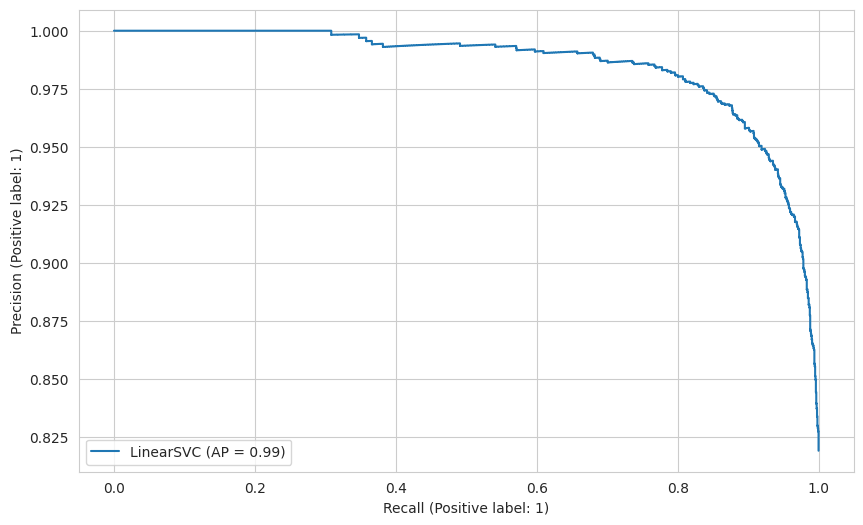

In [ ]:
PrecisionRecallDisplay.from_estimator(svc, 
                                      X_test_tf_idf, 
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, 
                            max_depth = 9, 
                            random_state = 42, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 322   88]
 [ 263 1592]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.79      0.65       410
           1       0.95      0.86      0.90      1855

    accuracy                           0.85      2265
   macro avg       0.75      0.82      0.77      2265
weighted avg       0.88      0.85      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.70      3691
           1       0.97      0.86      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.77      0.86      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [ ]:
model = RandomForestClassifier(100, 
                               max_depth = 9, 
                               random_state = 42, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.841
train_accuracy    0.865
test_f1           0.898
train_f1          0.913
test_recall       0.850
train_recall      0.865
test_precision    0.951
train_precision   0.968
dtype: float64

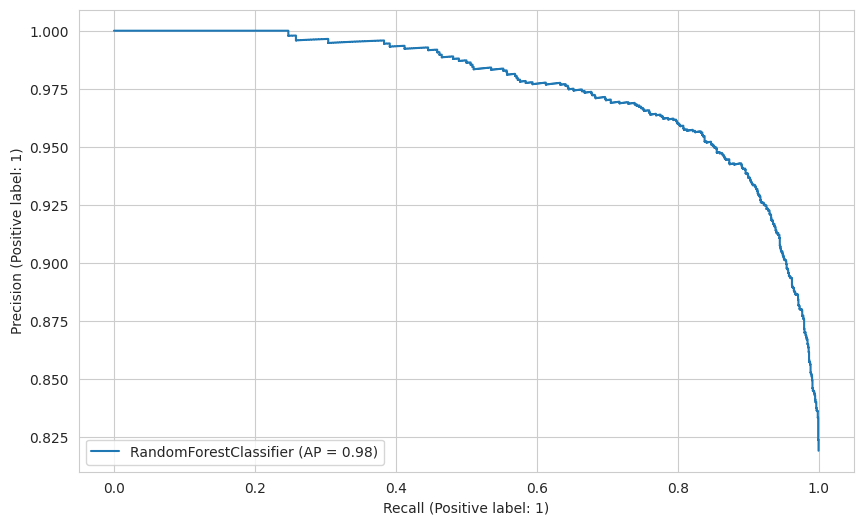

In [ ]:
PrecisionRecallDisplay.from_estimator(rf, 
                                      X_test_count, 
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, 
                            max_depth = 9, 
                            random_state = 42, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 323   87]
 [ 296 1559]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.79      0.63       410
           1       0.95      0.84      0.89      1855

    accuracy                           0.83      2265
   macro avg       0.73      0.81      0.76      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3691
           1       0.97      0.86      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.81     20376
weighted avg       0.90      0.86      0.87     20376



In [ ]:
model = RandomForestClassifier(100, 
                               max_depth = 9, 
                               random_state = 42, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.832
train_accuracy    0.864
test_f1           0.891
train_f1          0.912
test_recall       0.840
train_recall      0.859
test_precision    0.950
train_precision   0.971
dtype: float64

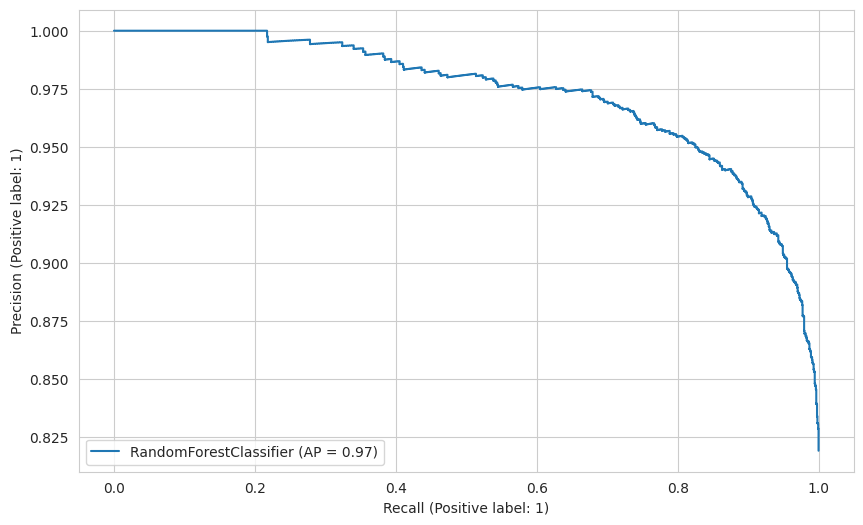

In [ ]:
PrecisionRecallDisplay.from_estimator(rf, 
                                      X_test_tf_idf, 
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100, 
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 208  202]
 [  68 1787]]
Test_Set
              precision    recall  f1-score   support

           0       0.75      0.51      0.61       410
           1       0.90      0.96      0.93      1855

    accuracy                           0.88      2265
   macro avg       0.83      0.74      0.77      2265
weighted avg       0.87      0.88      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.51      0.60      3691
           1       0.90      0.96      0.93     16685

    accuracy                           0.87     20376
   macro avg       0.81      0.73      0.76     20376
weighted avg       0.87      0.87      0.87     20376



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, 
                           random_state = 42)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.869
train_accuracy    0.875
test_f1           0.922
train_f1          0.926
test_recall       0.951
train_recall      0.954
test_precision    0.895
train_precision   0.899
dtype: float64

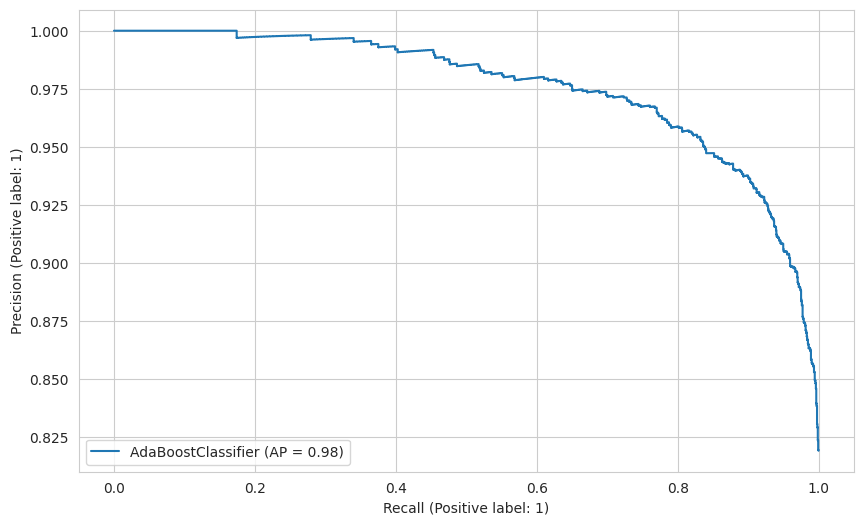

In [ ]:
PrecisionRecallDisplay.from_estimator(ada, 
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 100, 
                         random_state = 42, 
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 180  230]
 [  56 1799]]
Test_Set
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       410
           1       0.89      0.97      0.93      1855

    accuracy                           0.87      2265
   macro avg       0.82      0.70      0.74      2265
weighted avg       0.86      0.87      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.77      0.47      0.58      3691
           1       0.89      0.97      0.93     16685

    accuracy                           0.88     20376
   macro avg       0.83      0.72      0.75     20376
weighted avg       0.87      0.88      0.87     20376



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, 
                           random_state = 42, 
                           learning_rate=0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.868
train_accuracy    0.877
test_f1           0.923
train_f1          0.928
test_recall       0.963
train_recall      0.968
test_precision    0.886
train_precision   0.891
dtype: float64

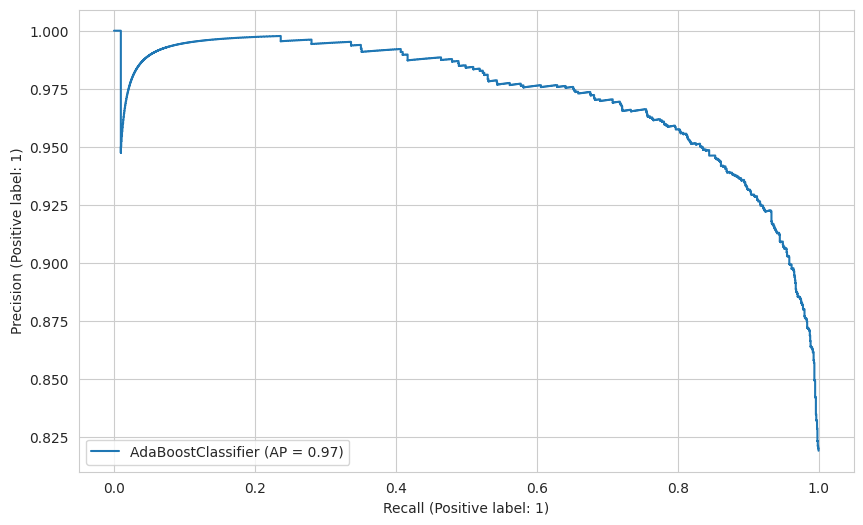

In [ ]:
PrecisionRecallDisplay.from_estimator(ada, 
                                      X_test_tf_idf, 
                                      y_test);

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [ ]:
num_words = 15001 
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.mean()

60.60699615741354

In [ ]:
num_tokens.min()

2

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 116

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, 
                                                    y, 
                                                    test_size=0.1, 
                                                    stratify=y, 
                                                    random_state=101)

 Embedding layer NLP modellerinde kullanılan bir layer olup 3 boyutlu bir tensörden oluşur. 
 1'inci boyutu train setindeki toplam yorum sayısı.
 2'inci boyutu her bir yorumun kaç tokenden oluştuğu (max_tokens).
 3'üncü boyutu her bir tokene ait word embeddingin kaç elemanlı bir vektörden oluştuğu (embedding_size).
 Yorumlar numeric versiona dönüştürülürken corpusta en sık kullanılan ilk 15000 token kullanıldığından, hem train hem de predicit aşamasında sadece corpusta en sık
 geçen ilk 15000 token kullanılsın diye Embedding layera imput_dim = num_words düzenlemesini yapıyoruz.
 Eğer imput_dim'i 15.000'den daha küçük bir sayı yaparsanız (10000 gibi) o zaman model corpusta en sık kullanılan ilk 10000 token ile eğitim ve prediction yapar.
 return_sequences=False modelin sadece son zaman adımındaki (t_n) hidden_state'i bir sonraki layera aktarır. defaultu False'dur.
 return_sequences= True,  modelin tüm zaman adımlarındaki (t_0, t_1, t_2 .....t_n gibi) tüm hidden_state'i bir sonraki LSTM, GRU layerlarına aktarır. Bu sayede  model tüm
 cümleyi aklında tutmaya çalışır. Bir LSTM/GRU layerından sonra yine bir LSTM/GRU layerı geliyorsa return_sequences=True olarak ayarlanmalıdır yoksa model hata döndürür. Ancak,
 sonraki layer dense layer ise return_sequences=False düzenlenmelidir aksi durumda model yine hata döndürür. Çünkü Dense layerlar sadece tek bir hidden_state ile çalışır.



### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", 
                           verbose=1, 
                           patience = 2, 
                           restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 65s 354ms/step - loss: 0.5029 - recall: 0.6850 - val_loss: 0.3305 - val_recall: 0.8496
Epoch 2/10
160/160 [==============================] - 53s 333ms/step - loss: 0.2991 - recall: 0.8593 - val_loss: 0.2967 - val_recall: 0.8803
Epoch 3/10
160/160 [==============================] - 57s 359ms/step - loss: 0.2410 - recall: 0.8848 - val_loss: 0.3101 - val_recall: 0.8965
Epoch 4/10
160/160 [==============================] - 56s 347ms/step - loss: 0.2104 - recall: 0.9032 - val_loss: 0.2876 - val_recall: 0.9256
Epoch 5/10
160/160 [==============================] - 56s 352ms/step - loss: 0.1641 - recall: 0.9242 - val_loss: 0.3334 - val_recall: 0.9121
Epoch 6/10
160/160 [==============================] - 53s 334ms/step - loss: 0.1457 - recall: 0.9349 - val_loss: 0.3601 - val_recall: 0.9429
Epoch 7/10
160/160 [==============================] - 57s 356ms/step - loss: 0.1274 - recall: 0.9443 - val_loss: 0.4015 - val_recall: 0.8809
Epoch 8/10
16

### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 0.503   0.685     0.331       0.850
1 0.299   0.859     0.297       0.880
2 0.241   0.885     0.310       0.896
3 0.210   0.903     0.288       0.926
4 0.164   0.924     0.333       0.912

<Axes: >

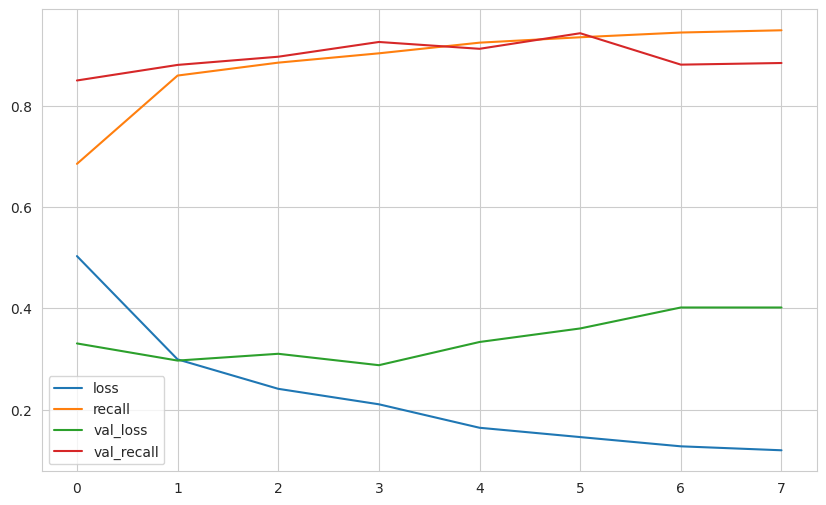

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 5s 55ms/step
[[ 263  147]
 [ 106 1749]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       410
           1       0.92      0.94      0.93      1855

    accuracy                           0.89      2265
   macro avg       0.82      0.79      0.80      2265
weighted avg       0.88      0.89      0.89      2265



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 24s 38ms/step
[[ 3445   246]
 [  498 16187]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3691
           1       0.99      0.97      0.98     16685

    accuracy                           0.96     20376
   macro avg       0.93      0.95      0.94     20376
weighted avg       0.96      0.96      0.96     20376



71/71 [==============================] - 4s 50ms/step


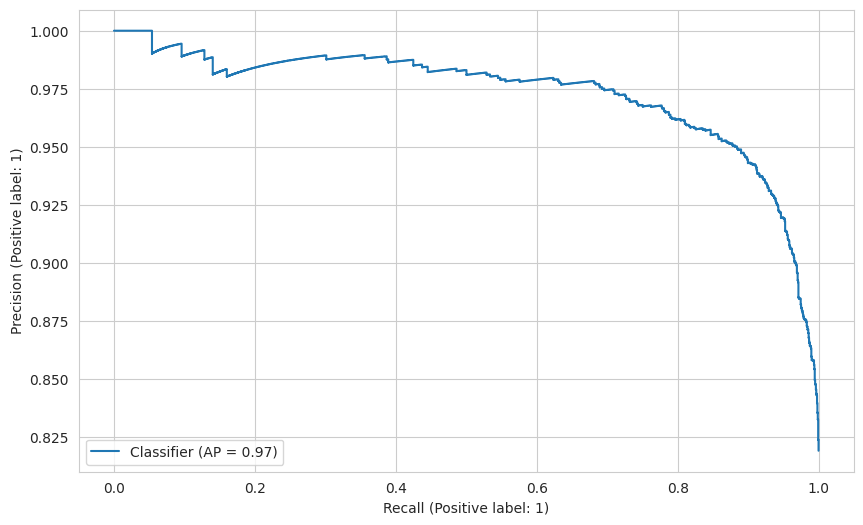

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9731007426293556

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.1 MB/s eta 0:00:00


### Read Data

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

### Train test split

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, 
                                                        y, 
                                                        test_size=0.1, 
                                                        stratify=y, 
                                                        random_state=101)

### Tokenization

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, 
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [ ]:
np.array(num_of_sent_tokens).mean()

76.75659202332052

In [ ]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Fixing token counts of all documents

In [ ]:
all_sentence_tokens = tokenizer(list(X), 
                                max_length=162, 
                                truncation=True,
                                padding='max_length', 
                                add_special_tokens=True)

In [ ]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X), 
                                  max_length=seq_len, 
                                  truncation=True,
                                  padding='max_length', 
                                  add_special_tokens=True) 

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
Xids_train

array([[ 101, 1045, 2387, ...,    0,    0,    0],
       [ 101, 1045, 3866, ...,    0,    0,    0],
       [ 101, 1045, 3641, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 3641, ...,    0,    0,    0],
       [ 101, 2023, 2327, ...,    0,    0,    0],
       [ 101, 2228, 3976, ...,    0,    0,    0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, 
                                                    Xmask_train, 
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, 
                                                   Xmask_test, 
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.1 MB/s eta 0:00:00


In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating optimization

In [ ]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___